In [208]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np
import re

%matplotlib inline

In [3]:
response = requests.get('http://www.nuforc.org/webreports/ndxpost.html').content
soup_doc = BeautifulSoup(response, 'html.parser')

In [14]:
new_reports = soup_doc.find_all('td')[:94]

In [22]:
new_reports[2].a['href']

'ndxp180713.html'

In [23]:
links = []
baselink = 'http://www.nuforc.org/webreports/'
for report in new_reports:
    try:
        endpoint = report.a['href']
        link = baselink + endpoint
        links.append(link)
    except:
        pass

In [27]:
response = requests.get(links[0]).content
soup_doc = BeautifulSoup(response, 'html.parser')

In [51]:
soup_doc.find_all('tr')[1:][0].find_all('td')[6].text

'7/19/18'

In [65]:
rows = []

for link in links:
    response = requests.get(link).content
    soup_doc = BeautifulSoup(response, 'html.parser')
    all_reports = soup_doc.find_all('tr')[1:]
    for report in all_reports:
        table_data = report.find_all('td')
        report_dict = {}
        try:
            report_dict['date_time'] = table_data[0].text
        except:
            pass
        try:
            report_dict['city'] = table_data[1].text
        except:
            pass
        try:
            report_dict['state'] = table_data[2].text
        except:
            pass
        try:
            report_dict['shape'] = table_data[3].text
        except:
            pass
        try:
            report_dict['duration'] = table_data[4].text
        except:
            pass
        try:
            report_dict['summary'] = table_data[5].text
        except:
            pass
        try:
            report_dict['posted'] = table_data[6].text
        except:
            pass
        endpoint = table_data[0].a['href']
        report_link = baselink + endpoint
        try:
            report_dict['report_link'] = report_link
        except:
            pass
        new_response = requests.get(report_link).content
        new_soup_doc = BeautifulSoup(new_response, 'html.parser')
        try:
            report_dict['stats'] = new_soup_doc.find_all('td')[0].text
        except:
            pass
        try:
            report_dict['text'] = new_soup_doc.find_all('td')[1].text
        except:
            pass
            
        rows.append(report_dict)

In [69]:
len(rows)

4359

In [99]:
df = pd.DataFrame(rows)

In [100]:
df.head()

,city,date_time,duration,posted,report_link,shape,state,stats,summary,text
0,Fort Collins,7/18/18 21:50,45 minutes,7/19/18,http://www.nuforc.org/webreports/142/S142315.html,Light,CO,Occurred : 7/18/2018 21:50 (Entered as : 07/1...,"Amber light drops from sky, stops abruptly, sh...","Amber light drops from sky, stops abruptly, sh..."
1,Vance,7/18/18 21:30,2-3 minutes,7/19/18,http://www.nuforc.org/webreports/142/S142313.html,Light,AL,Occurred : 7/18/2018 21:30 (Entered as : 07/1...,Bright white light moving at speed headed sout...,Bright white light moving at speed headed sout...
2,Davenport,7/18/18 21:15,10 seconds,7/19/18,http://www.nuforc.org/webreports/142/S142316.html,Light,WA,Occurred : 7/18/2018 21:15 (Entered as : 07/1...,Light moving at an exceptionally high rate of ...,Light moving at an exceptionally high rate of ...
3,North Las Vegas,7/18/18 21:00,5 minutes,7/19/18,http://www.nuforc.org/webreports/142/S142318.html,Oval,NV,Occurred : 7/18/2018 21:00 (Entered as : 07/1...,Orb like UFO followed by High Speed Aircraft o...,Orb like UFO followed by High Speed Aircraft o...
4,Peculiar,7/18/18 20:45,1 minutes,7/19/18,http://www.nuforc.org/webreports/142/S142314.html,Cylinder,MO,Occurred : 7/18/2018 20:45 (Entered as : 07/1...,Object was moving from northeast to south west...,Object was moving from northeast to south west...


In [73]:
df.to_csv('updated-ufo-sightings.csv', index=False)

In [74]:
df_old = pd.read_csv('nuforc_reports_2017.csv')

In [76]:
df.dtypes

city           object
date_time      object
duration       object
posted         object
report_link    object
shape          object
state          object
stats          object
summary        object
text           object
dtype: object

In [75]:
df_old.drop([columns=])

summary            object
city               object
state              object
date_time          object
shape              object
duration           object
stats              object
report_link        object
text               object
posted             object
city_latitude     float64
city_longitude    float64
dtype: object

In [129]:
locations = df_old[['city', 'state', 'city_latitude', 'city_longitude']]

In [130]:
locations

,city,state,city_latitude,city_longitude
0,Salem,OR,44.941247,-123.004235
1,Ellsworth,ME,44.651300,-68.450700
2,San Antonio,TX,29.488866,-98.475240
3,Port Saint Lucie,FL,27.285686,-80.363444
4,Whitefish,MT,48.411100,-114.337600
5,Swanville,ME,NaN,NaN
6,Duxbury,MA,42.049490,-70.693082
7,Studio City,CA,34.138265,-118.392057
8,Hernando,FL,28.935600,-82.389500
9,Mananlapan,NJ,NaN,NaN


In [141]:
locations.drop_duplicates(inplace=True)

/Users/kevinlitnav/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [145]:
locations.head()

,city,state,city_latitude,city_longitude
0,Salem,OR,44.941247,-123.004235
1,Ellsworth,ME,44.651300,-68.450700
2,San Antonio,TX,29.488866,-98.475240
3,Port Saint Lucie,FL,27.285686,-80.363444
4,Whitefish,MT,48.411100,-114.337600


In [140]:
df.columns

Index(['city', 'date_time', 'duration', 'posted', 'report_link', 'shape',
       'state', 'stats', 'summary', 'text'],
      dtype='object')

In [154]:
df_new_locations = df.merge(locations, left_on=['city', 'state'], right_on=['city', 'state'], how='left')

In [159]:
df_new_locations.shape

(4359, 12)

In [158]:
df_old.shape

(112095, 12)

In [164]:
fulldf = pd.concat([df_new_locations, df_old])

/Users/kevinlitnav/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [166]:
fulldf.shape

(116454, 12)

In [167]:
fulldf.to_csv('all-ufo-sightings-thru-08-06-2018.csv', index=False)

In [198]:
fulldf

,city,city_latitude,city_longitude,date_time,duration,posted,report_link,shape,state,stats,summary,text,seen_at
0,Fort Collins,40.550698,-105.077295,7/18/18 21:50,45 minutes,7/19/18,http://www.nuforc.org/webreports/142/S142315.html,Light,CO,Occurred : 7/18/2018 21:50 (Entered as : 07/1...,"Amber light drops from sky, stops abruptly, sh...","Amber light drops from sky, stops abruptly, sh...",2018-07-18 21:50:00
1,Vance,33.218400,-87.228700,7/18/18 21:30,2-3 minutes,7/19/18,http://www.nuforc.org/webreports/142/S142313.html,Light,AL,Occurred : 7/18/2018 21:30 (Entered as : 07/1...,Bright white light moving at speed headed sout...,Bright white light moving at speed headed sout...,2018-07-18 21:30:00
2,Davenport,47.675000,-118.197800,7/18/18 21:15,10 seconds,7/19/18,http://www.nuforc.org/webreports/142/S142316.html,Light,WA,Occurred : 7/18/2018 21:15 (Entered as : 07/1...,Light moving at an exceptionally high rate of ...,Light moving at an exceptionally high rate of ...,2018-07-18 21:15:00
3,North Las Vegas,36.243659,-115.144963,7/18/18 21:00,5 minutes,7/19/18,http://www.nuforc.org/webreports/142/S142318.html,Oval,NV,Occurred : 7/18/2018 21:00 (Entered as : 07/1...,Orb like UFO followed by High Speed Aircraft o...,Orb like UFO followed by High Speed Aircraft o...,2018-07-18 21:00:00
4,Peculiar,38.703100,-94.473700,7/18/18 20:45,1 minutes,7/19/18,http://www.nuforc.org/webreports/142/S142314.html,Cylinder,MO,Occurred : 7/18/2018 20:45 (Entered as : 07/1...,Object was moving from northeast to south west...,Object was moving from northeast to south west...,2018-07-18 20:45:00
5,Albuquerque,35.103481,-106.612475,7/18/18 20:45,2 minutes,7/19/18,http://www.nuforc.org/webreports/142/S142312.html,Other,NM,Occurred : 7/18/2018 20:45 (Entered as : 07/1...,I was on the roof when my son looked up and sa...,I was on the roof when my son looked up and sa...,2018-07-18 20:45:00
6,Grantwood village,NaN,NaN,7/18/18 18:43,4 minutes,7/19/18,http://www.nuforc.org/webreports/142/S142310.html,Cigar,MO,Occurred : 7/18/2018 18:43 (Entered as : 07/1...,I thought it was a plane due to alot passing b...,I thought it was a plane due to alot passing b...,2018-07-18 18:43:00
7,Peruíbe (Brazil),NaN,NaN,7/18/18 18:30,2 seconds,7/19/18,http://www.nuforc.org/webreports/142/S142255.html,Light,,Occurred : 7/18/2018 18:30 (Entered as : 07/1...,Avistamento em Peruíbe,Avistamento em PeruíbeEstava olhando para o pl...,2018-07-18 18:30:00
8,Tice,NaN,NaN,7/18/18 11:00,2 hours,7/19/18,http://www.nuforc.org/webreports/142/S142311.html,Other,FL,Occurred : 7/18/2018 11:00 (Entered as : 7/18...,Silent UFO mimic jets still floating over. ((...,Silent UFO mimic jets still floating over.A re...,2018-07-18 11:00:00
9,Lake in the Hills,42.187000,-88.346500,7/18/18 03:30,30 minutes to 1 hour,7/19/18,http://www.nuforc.org/webreports/142/S142303.html,Light,IL,Occurred : 7/18/2018 03:30 (Entered as : 07/1...,"Started as one light and then split into 3, on...","Started as one light and then split into 3, on...",2018-07-18 03:30:00


In [178]:
fulldf.date_time = fulldf.date_time.str.replace('O8/01/1977 14:00', '08/01/1977 14:00')

In [181]:
fulldf.date_time = fulldf.date_time.str.replace('md 9 10:10', '10/19/17 21:00')

In [182]:
fulldf['seen_at'] = pd.to_datetime(fulldf.date_time)

In [185]:
fulldf

,city,city_latitude,city_longitude,date_time,duration,posted,report_link,shape,state,stats,summary,text,seen_at
0,Fort Collins,40.550698,-105.077295,7/18/18 21:50,45 minutes,7/19/18,http://www.nuforc.org/webreports/142/S142315.html,Light,CO,Occurred : 7/18/2018 21:50 (Entered as : 07/1...,"Amber light drops from sky, stops abruptly, sh...","Amber light drops from sky, stops abruptly, sh...",2018-07-18 21:50:00
1,Vance,33.218400,-87.228700,7/18/18 21:30,2-3 minutes,7/19/18,http://www.nuforc.org/webreports/142/S142313.html,Light,AL,Occurred : 7/18/2018 21:30 (Entered as : 07/1...,Bright white light moving at speed headed sout...,Bright white light moving at speed headed sout...,2018-07-18 21:30:00
2,Davenport,47.675000,-118.197800,7/18/18 21:15,10 seconds,7/19/18,http://www.nuforc.org/webreports/142/S142316.html,Light,WA,Occurred : 7/18/2018 21:15 (Entered as : 07/1...,Light moving at an exceptionally high rate of ...,Light moving at an exceptionally high rate of ...,2018-07-18 21:15:00
3,North Las Vegas,36.243659,-115.144963,7/18/18 21:00,5 minutes,7/19/18,http://www.nuforc.org/webreports/142/S142318.html,Oval,NV,Occurred : 7/18/2018 21:00 (Entered as : 07/1...,Orb like UFO followed by High Speed Aircraft o...,Orb like UFO followed by High Speed Aircraft o...,2018-07-18 21:00:00
4,Peculiar,38.703100,-94.473700,7/18/18 20:45,1 minutes,7/19/18,http://www.nuforc.org/webreports/142/S142314.html,Cylinder,MO,Occurred : 7/18/2018 20:45 (Entered as : 07/1...,Object was moving from northeast to south west...,Object was moving from northeast to south west...,2018-07-18 20:45:00
5,Albuquerque,35.103481,-106.612475,7/18/18 20:45,2 minutes,7/19/18,http://www.nuforc.org/webreports/142/S142312.html,Other,NM,Occurred : 7/18/2018 20:45 (Entered as : 07/1...,I was on the roof when my son looked up and sa...,I was on the roof when my son looked up and sa...,2018-07-18 20:45:00
6,Grantwood village,NaN,NaN,7/18/18 18:43,4 minutes,7/19/18,http://www.nuforc.org/webreports/142/S142310.html,Cigar,MO,Occurred : 7/18/2018 18:43 (Entered as : 07/1...,I thought it was a plane due to alot passing b...,I thought it was a plane due to alot passing b...,2018-07-18 18:43:00
7,Peruíbe (Brazil),NaN,NaN,7/18/18 18:30,2 seconds,7/19/18,http://www.nuforc.org/webreports/142/S142255.html,Light,,Occurred : 7/18/2018 18:30 (Entered as : 07/1...,Avistamento em Peruíbe,Avistamento em PeruíbeEstava olhando para o pl...,2018-07-18 18:30:00
8,Tice,NaN,NaN,7/18/18 11:00,2 hours,7/19/18,http://www.nuforc.org/webreports/142/S142311.html,Other,FL,Occurred : 7/18/2018 11:00 (Entered as : 7/18...,Silent UFO mimic jets still floating over. ((...,Silent UFO mimic jets still floating over.A re...,2018-07-18 11:00:00
9,Lake in the Hills,42.187000,-88.346500,7/18/18 03:30,30 minutes to 1 hour,7/19/18,http://www.nuforc.org/webreports/142/S142303.html,Light,IL,Occurred : 7/18/2018 03:30 (Entered as : 07/1...,"Started as one light and then split into 3, on...","Started as one light and then split into 3, on...",2018-07-18 03:30:00


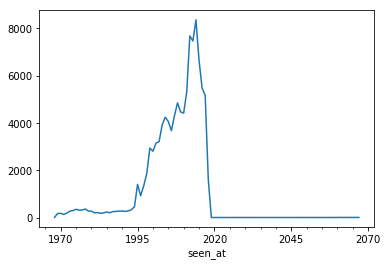

In [187]:
fulldf.resample("A", on='seen_at').state.count().plot()

In [205]:
fulldf[fulldf.seen_at.dt.year > 2018].date_time.sub(r"^(\d+/\d+/)(\d\d)", r"\119\2")

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [224]:
def fix_century(row):
    re.sub(r'(\d{1-2}/\d{1-2}/)(\d{2})', r'\g<1>19\2', row.date_time)
    return row.date_time

In [246]:
fulldf[fulldf.seen_at.dt.year > 2018].seen_at.dt.year.replace('20', '19', inplace=True)

/Users/kevinlitnav/.pyenv/versions/3.6.4/lib/python3.6/site-packages/pandas/core/generic.py:5886: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  self._update_inplace(new_data)


In [249]:
fulldf['fix_up_time'] = fulldf.seen_at.astype(str)

In [280]:
fulldf[fulldf.seen_at.dt.year > 2018].fix_up_time.replace('^20', '19', regex=True,inplace = True)






/Users/kevinlitnav/.pyenv/versions/3.6.4/lib/python3.6/site-packages/pandas/core/generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [292]:
fulldf.drop(columns=['fix_up_time'],inplace=True)

In [302]:
drop_rows = fulldf[fulldf.seen_at.dt.year > 2018].index.tolist()

In [303]:
fulldf.drop(index=drop_rows, inplace=True)

In [305]:
fulldf[fulldf.seen_at.dt.year > 2018]

,city,city_latitude,city_longitude,date_time,duration,posted,report_link,shape,state,stats,summary,text,seen_at


In [306]:
fulldf.to_csv('all-ufo-sightings-thru-08-06-2018.csv', index=False)

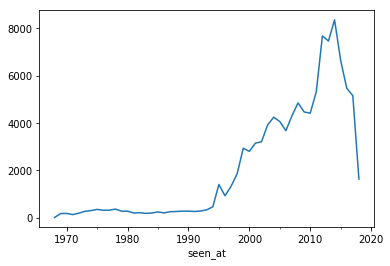

In [307]:
fulldf.resample("A", on='seen_at').state.count().plot()

In [308]:
df_no_2018 = fulldf[fulldf.seen_at.dt.year != 2018]

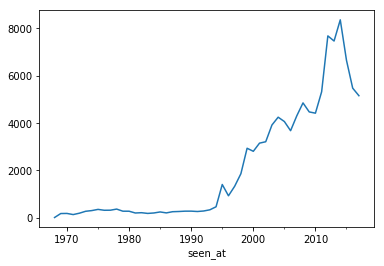

In [309]:
df_no_2018.resample("A", on='seen_at').state.count().plot()